We have length and width of sepals and petals of flower and we need to predict which species does that flower belongs to.

Import the libraies you need to solve the problem

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
import warnings 
warnings.filterwarnings("ignore")

Step 2 : Data visualization

Import Data

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data = data[~data.species.str.contains("setosa")]
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


Now apply onehotencoding on label data

In [4]:
data.species.unique()

array(['versicolor', 'virginica'], dtype=object)

In [5]:
data = pd.get_dummies(data, columns=["species"])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
50,7.0,3.2,4.7,1.4,1,0
51,6.4,3.2,4.5,1.5,1,0
52,6.9,3.1,4.9,1.5,1,0
53,5.5,2.3,4.0,1.3,1,0
54,6.5,2.8,4.6,1.5,1,0


In oneHotEncoding we have to select n-1 columns where n = number of unique categorical values. So we'll have to drop species_virginica column

In [6]:
data = data.drop(columns="species_virginica", axis=0)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


See the content of the dataset so that we could get the basic idea about data we are dealing with

Divide the data into features and label

In [7]:
X = data.drop(columns="species_versicolor")
y = data.species_versicolor

Now see the data type of each column in the data

In [8]:
data.dtypes

sepal_length          float64
sepal_width           float64
petal_length          float64
petal_width           float64
species_versicolor      uint8
dtype: object

See the information about the data to see if it contains any null values, data type of each column, total number of observations, etc

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 5 columns):
sepal_length          100 non-null float64
sepal_width           100 non-null float64
petal_length          100 non-null float64
petal_width           100 non-null float64
species_versicolor    100 non-null uint8
dtypes: float64(4), uint8(1)
memory usage: 4.0 KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,100.0,6.262,0.662834,4.9,5.800,6.3,6.700,7.9
sepal_width,100.0,2.872,0.332751,2.0,2.700,2.9,3.025,3.8
petal_length,100.0,4.906,0.825578,3.0,4.375,4.9,5.525,6.9
petal_width,100.0,1.676,0.424769,1.0,1.300,1.6,2.000,2.5
species_versicolor,100.0,0.500,0.502519,0.0,0.000,0.5,1.000,1.0


Note : None and NA are two different things. So we need to check for them seperately. data.info()
will give if there is any null value in our data it doesn't talk about NA values in our data.

In [11]:
data.isna().sum()

sepal_length          0
sepal_width           0
petal_length          0
petal_width           0
species_versicolor    0
dtype: int64

In [12]:
data.isnull().sum()

sepal_length          0
sepal_width           0
petal_length          0
petal_width           0
species_versicolor    0
dtype: int64

Plot the box plot for data frames to check outliers
Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one.  Here the small circles outside the box plot denote the outliers. Outliers are generaly very few in number but if we take average of data then they massively affect the data. Therefore we remove them.


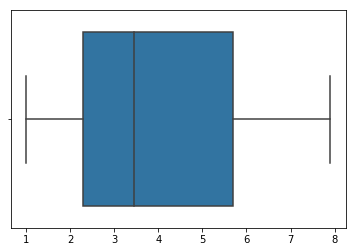

In [13]:
sb.boxplot(X)

Here data has no outliers. So no need to do anything.

We need to do feature scaling for the features in our data i.e. X data. Most of the times, your dataset will contain features highly varying in magnitudes, units, and range. But since most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem. There are a few ways you can perform feature scaling :
1. Standardization
2. Mean Normalization
3. Min-Max Scaling
4. Unit Vector
No need to apply feature scaling on the label.


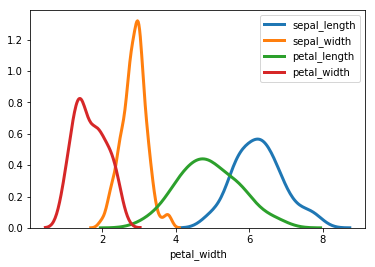

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb

for name in X.columns:
    sb.distplot(X[name],hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name)

In [15]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5


In [16]:
# Standardization : 
def standardization(dataset):
    for name in dataset.columns:
        temp = 0
        temp_arr = np.array([])
        dataset[name] = (dataset[name] - dataset[name].mean()) / np.nanstd(dataset[name])

    return dataset

X = standardization(X)

In [17]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
50,1.119009,0.990688,-0.250779,-0.653039
51,0.209246,0.990688,-0.494254,-0.416431


As you can see, data has brought to a perticular range. This is what feature scaling is. In this way we can convert data into bell shape.
You can see this by comparing the distplots for X dataset before and after we apply feature scaling

Now check for the skewness of the data using distplot

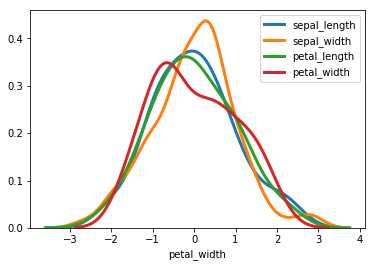

In [18]:
import matplotlib.pyplot as plt
import seaborn as sb

for name in X.columns:
    sb.distplot(X[name],hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name)

Now check for the skewness of data
There are 5 ways to remove skewness. You have to use hit and try method for this because we want our skewness in the range -0.5 to 0.5. Here we have to choose the smallest value between -1 and 1 which should be nearest to  -1 and 1. I have explained it in next portion.
    1. Square root method
    2. Cube root method
    3. Log method
    4. Inverse method
    5. The root of the square root method



Here lowest is -0.09 but -0.47 is more near to -1. Hence chose log function. sepal_length

This is a unsupervised problem. Here we'll apply classification algorithm on it.

Now we'll divide the data into train and test datasets. 
The training dataset (also called training set, learning set, or AI training data) is the initial dataset used to train an algorithm to understand how to apply technologies such as neural networks, to learn and produce complex results. It includes both input data and the corresponding expected output. The purpose of the training dataset is to provide your algorithm with “ground truth” data.

The test dataset, however, is used to assess how well your algorithm was trained with the training dataset. You can’t simply reuse the training dataset in the testing stage because the algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm.


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
105,2.028773,0.386610,2.062232,1.003219
138,-0.397263,0.386610,-0.129042,0.293394
76,0.815755,-0.217468,-0.129042,-0.653039
92,-0.700518,-0.821546,-1.102941,-1.126256
119,-0.397263,-2.029702,0.114433,-0.416431


train function will optimize the parameters and generate our model.

In [33]:
def trains(X_train, y_train, theta_vector):
    
    lamda = 0.0010
        # X_train = (80 x 4)
    X_train = np.column_stack((np.ones((X_train.shape[0], 1), dtype=float), X_train)) # (80 x 5)
    
    for i in range(iterations):
        z = np.dot(X_train, theta_vector) # (80 x 5) * (5 x 1) = (80 x 1)
        
        y_train = np.array(y_train) 
        y_train = y_train.reshape(len(y_train),1)
        
        sigmoid = (1 / (1 + np.exp(-z))) # (80 x 1)
        a = sigmoid - y_train  # (80 x 1) - (80 x 1) = (80 x 1)
        temp = np.dot( X_train.T, a) # (5 x 80) * (80 x 1) = (5 x 1)
        temp = np.dot(temp, l_rate) / len(X_train) # (5 x 1)
        theta_vector = theta_vector - temp # (5 x 1)
    return theta_vector

classify function will predict the values using our model

In [34]:
def classify(X_test, theta_vector):
    
    y_prediction = np.zeros((X_test.shape[0], 1), dtype=float) # (20 x 1)
    X_test = np.column_stack((np.ones((X_test.shape[0], 1)), X_test)) # (20 x 5)
    z = np.dot(X_test, theta_vector) # (20 x 5) * (5 x 1) = (20 x 1)
    sigmoid = np.array(1 / (1 + np.exp(-z)))  # (80 x 1)
    for i in (range(0, len(sigmoid))):
        if round(sigmoid[i][0], 2) <= 0.5:
            y_prediction[i][0] = 0
        else:
            y_prediction[i][0] = 1
    return y_prediction

accuracy will calculate the accuracy of our model

In [35]:
def accuracy(y_test, y_pred_test):
    total_error = 0
    error = []
    for i in range(0, len(y_test)):
        total_error = total_error + abs((y_pred_test[i] - y_test[i]) / y_test[i])
    total_error = (total_error / len(y_test))
    accuracy = 1 - total_error
    return accuracy * 100

In [37]:
theta_vector = np.zeros(((X_train.shape[1] + 1), 1), dtype='f')

l_rate = 0.0048
iterations = 2000

y_test = np.array(y_test)
y_test = y_test.reshape(len(y_test),1)

parameters = trains(X_train, y_train, theta_vector)
y_prediction_test = classify(X_test, parameters)

test_acc = round(float(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

print("test accuracy:", test_acc, "%")

test accuracy: 90 %


Here we got 90% accuracy for the model